In [2]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# loading the dataset
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# checking number of rows and columns
data.shape

(1599, 12)

In [5]:
# data statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# checking if there are null values in the dataset
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

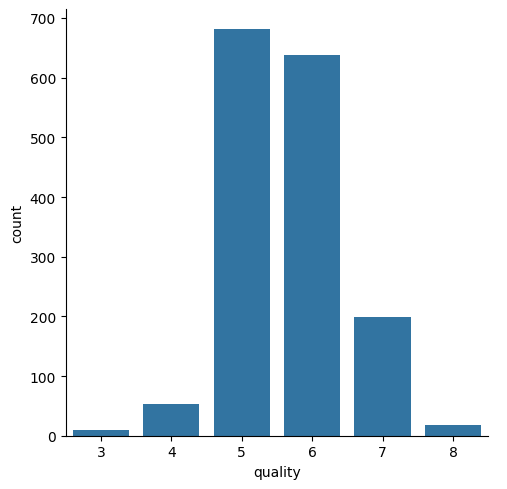

In [7]:
# creating a visualization  for quality 
sns.catplot(x='quality', data=data, kind='count')

In [8]:
# counting the values for each quality point
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='volatile acidity'>

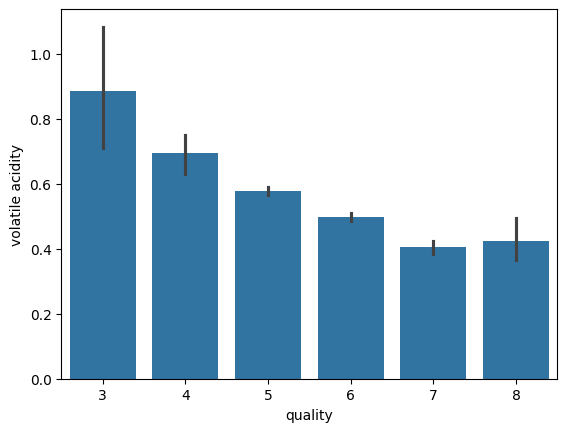

In [9]:
# checking if there correlation between quality score and volatile acidity
sns.barplot(x='quality', y='volatile acidity', data=data) 

<Axes: xlabel='quality', ylabel='citric acid'>

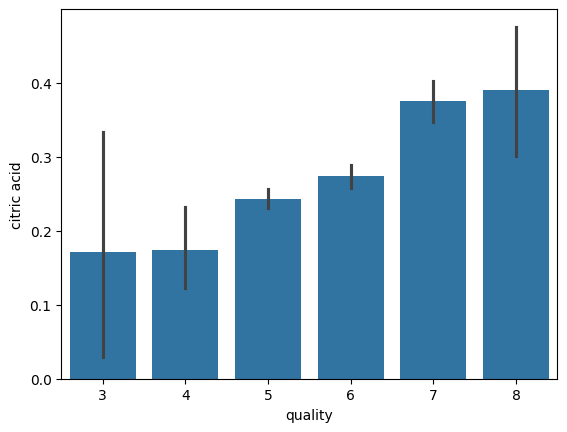

In [10]:
# checking if there correlation between quality score and citric acid

sns.barplot(x='quality', y='citric acid', data=data) 

In [11]:
# creating a correlation variable
corr = data.corr()


<Axes: >

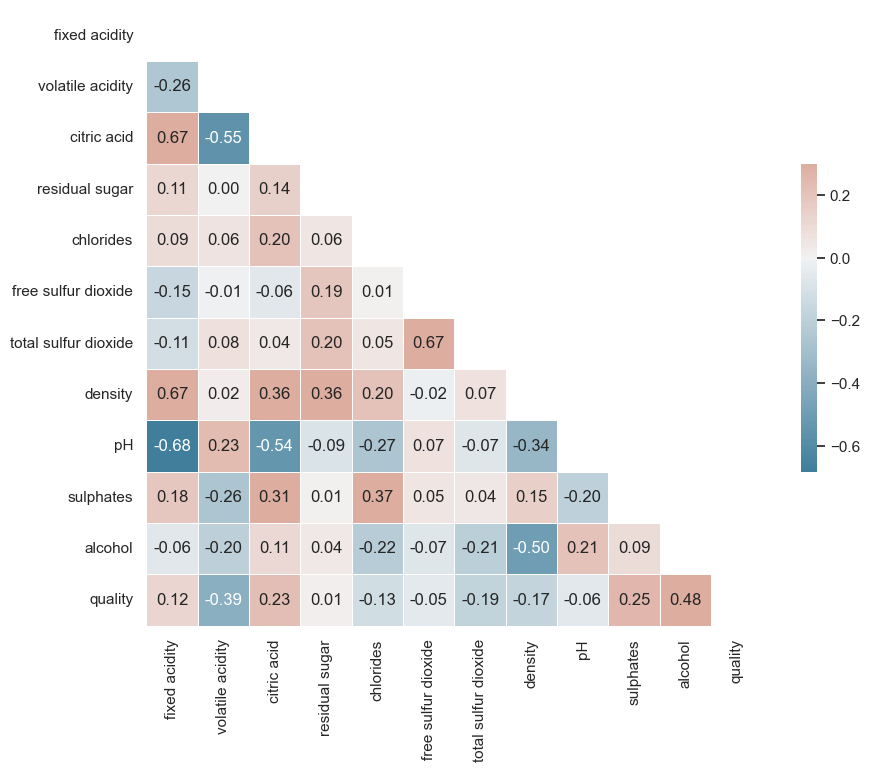

In [12]:
# plotting a correlation figure

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
# setting the features and target datasets
X = data.drop(['quality'], axis=1)
y = data['quality']

In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## Label Binarization

In [15]:
# for the classification purposes the wines that have score iqual or greater than 7 are good, otherwise not
def binarization(i):
    if i >= 7:
      return 1
    else:
      return 0

In [16]:
# transforming the column with the binarization function
y_try = y.apply(binarization)

In [17]:
# checking if the function worked
y_try

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [18]:
# count the values for each classification
y_try.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [19]:
# spliting the data in train and test samples
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_try, random_state=3, test_size=0.2)

In [21]:
# importing the model
from sklearn.ensemble import RandomForestClassifier

In [22]:
# fitting and prediction  train sample
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_train)

In [23]:
# importing metrics to analyze the results
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# the accuracy score is too goods, which can be seen as an overfitting
acc = accuracy_score(y_train, pred)
acc

1.0

In [25]:
#  prediction  test sample
# the accuracy score is too goods, which can be seen as an overfitting

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.928125

In [26]:
classification = classification_report(y_test, pred)
print(classification)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       283
           1       0.79      0.51      0.62        37

    accuracy                           0.93       320
   macro avg       0.87      0.75      0.79       320
weighted avg       0.92      0.93      0.92       320



### Try with Classification from 3 to 8

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=1000, max_depth=10)
model.fit(X_train, y_train)
pred = model.predict(X_train)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
acc = accuracy_score(y_train, pred)
acc

0.9593432369038312

In [30]:
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.740625

In [31]:
classification = classification_report(y_test, pred)
print(classification)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        12
           5       0.77      0.84      0.81       138
           6       0.71      0.79      0.74       131
           7       0.78      0.50      0.61        36
           8       0.00      0.00      0.00         1

    accuracy                           0.74       320
   macro avg       0.38      0.35      0.36       320
weighted avg       0.71      0.74      0.72       320



c:\Users\adams\Desktop\machine_learning\portfolio_machine_learning\wine_quality_random_forrest_classifier\env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adams\Desktop\machine_learning\portfolio_machine_learning\wine_quality_random_forrest_classifier\env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\adams\Desktop\machine_learning\portfolio_machine_learning\wine_quality_random_forrest_classifier\env\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarnin